# Data Project. Python For Data

Estos conjuntos de datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para determinar si el producto (depósito a plazo bancario) sería suscrito o no. Las columnas que tenemos en el primer dataset ('bank-additional.csv') son:
- age: La edad del cliente.
- job: La ocupación o profesión del cliente.
- marital: El estado civil del cliente.
- education: El nivel educativo del cliente.
- default: Indica si el cliente tiene algún historial de incumplimiento de pagos (1: Sí, 0: No).
- housing: Indica si el cliente tiene un préstamo hipotecario (1: Sí, 0: No).
- loan: Indica si el cliente tiene algún otro tipo de préstamo (1: Sí, 0: No).
- contact: El método de contacto utilizado para comunicarse con el cliente.
- duration: La duración en segundos de la última interacción con el cliente.
- campaign: El número de contactos realizados durante esta campaña para este cliente.
- pdays: Número de días que han pasado desde la última vez que se contactó con el cliente durante esta campaña.
- previous: Número de veces que se ha contactado con el cliente antes de esta campaña.
- poutcome: Resultado de la campaña de marketing anterior.
- emp.var.rate: La tasa de variación del empleo.
- cons.price.idx: El índice de precios al consumidor.
- cons.conf.idx: El índice de confianza del consumidor.
- euribor3m: La tasa de interés de referencia a tres meses.
- nr.employed: El número de empleados.
- y: Indica si el cliente ha suscrito un producto o servicio (Sí/No).
- date: La fecha en la que se realizó la interacción con el cliente.
- contact_month: Mes en el que se realizó la interacción con el cliente durante la campaña de marketing.
- contact_year: Año en el que se realizó la interacción con el cliente durante la campaña de marketing.
- id_: Un identificador único para cada registro en el dataset.

El segundo set de datos ('customer-details.xlsx') es un archivo Excel que nos da información sobre las características demográficas y comportamiento de compra de los clientes del banco. Este Excel consta de 3 hojas de trabajo diferentes, en cada una de ellas tenemos los clientes que entraron en el banco en diferentes años. Sus columnas son:
- Income: Representa el ingreso anual del cliente en términos monetarios.
- Kidhome: Indica el número de niños en el hogar del cliente.
- Teenhome: Indica el número de adolescentes en el hogar del cliente.
- Dt_Customer: Representa la fecha en que el cliente se convirtió en cliente de la empresa.
- NumWebVisitsMonth: Indica la cantidad de visitas mensuales del cliente al sitio web de la empresa.
- ID: Identificador único del cliente.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Importación de los datos desde un CSV y un EXCEL
data1 = pd.read_csv('/Users/claudiarm2002/Documents/DatosProyecto/bank-additional.csv', sep=',', header=0, index_col=0)

In [63]:
pd.set_option('display.max_columns', None)
data1.head(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [12]:
# Miramos si hay duplicados
data1.duplicated().sum()

0

In [13]:
# Vista general de la información del DataFrame
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

In [14]:
# Recuento de nulos por columna
data1.isnull().sum()

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

## Limpieza de los datos de la tabla CVS

Empezamos a limpiar la información por columnas.

In [17]:
# Copiamos el DataFrame original para trabajar sobre él
data_clean = data1.copy()

### Limpieza de la columna 'age'

En esta columna observamos muchos NaN y que debe ser 'int64' en vez de 'float64'.

In [81]:
# Miramos porcentaje de nulos en la columna 'age'
data1['age'].isnull().sum() / len(data_clean) * 100

11.906976744186046

In [37]:
data_clean['age'].describe()

count    42655.000000
mean        39.768984
std          9.944031
min         17.000000
25%         33.000000
50%         38.000000
75%         46.000000
max         98.000000
Name: age, dtype: float64

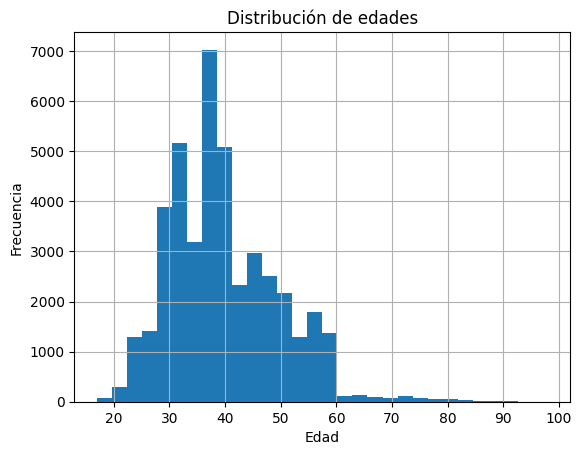

In [38]:
data_clean['age'].hist(bins=30)
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show() 

La columna no sigue una distribución normal y está sesgada. Por lo tanto, usaremos una estrategia de imputación condicional (rellenar con la mediana por grupo) utilizando otra columna categórica (e.g., 'job' o 'education') para mantener la coherencia de los datos.

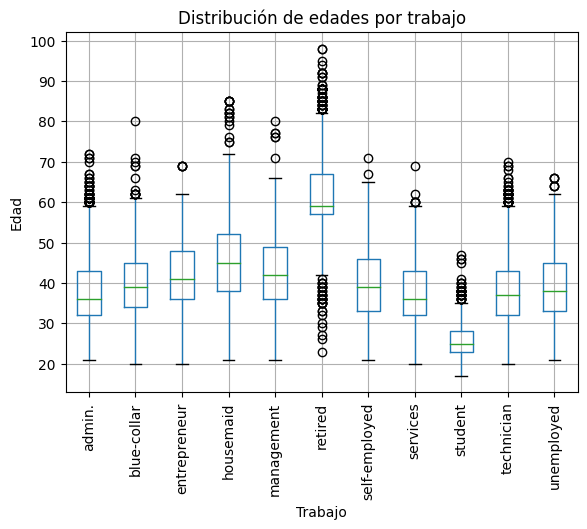

In [ ]:
data_clean.boxplot(column='age', by='job', rot=90)
plt.title('Distribución de edades por trabajo')
plt.suptitle('')
plt.xlabel('Trabajo')
plt.ylabel('Edad')
plt.show()

En este grafico de cajas podemos observar que hay cierta relación entre el trabajo y la edad, pero también que hay muchos outliers.

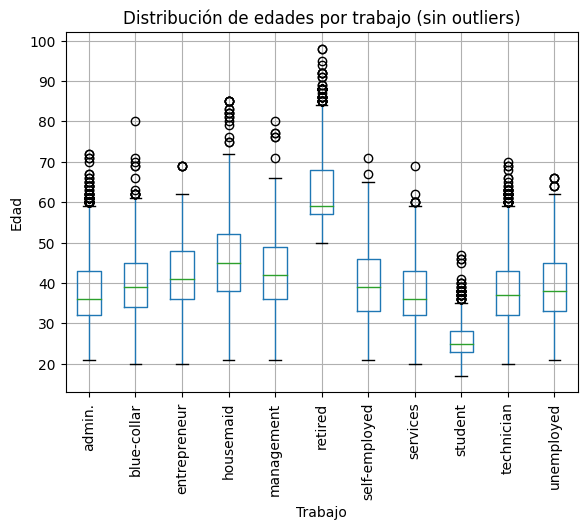

In [53]:
# Primero eliminamos los outliers inferiores de 'age' donde 'job' es retired, que no tienen ningun sentido.
# Nos quedamos solo con los datos que tienen sentido.
data_no_outliers = data_clean[~((data_clean['job'] == 'retired') & (data_clean['age'] < 50))]
data_no_outliers.boxplot(column='age', by='job', rot=90)
plt.title('Distribución de edades por trabajo (sin outliers)')
plt.suptitle('')
plt.xlabel('Trabajo')
plt.ylabel('Edad')
plt.show()

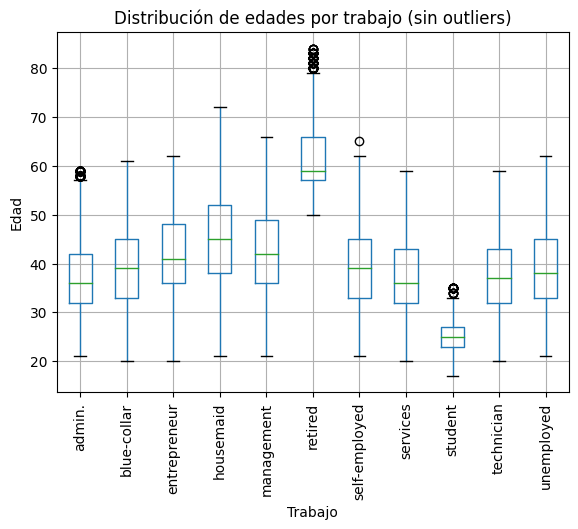

In [54]:
# Limpieza de todos los outliers por cada grupo de 'job'
Q1 = data_no_outliers.groupby('job')['age'].quantile(0.25)
Q3 = data_no_outliers.groupby('job')['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def remove_outliers(row):
    job = row['job']
    age = row['age']
    if pd.isnull(age):
        return True
    if age < lower_bound[job] or age > upper_bound[job]:
        return False
    return True
data_no_outliers_final = data_no_outliers[data_no_outliers.apply(remove_outliers, axis=1)]
data_no_outliers_final.boxplot(column='age', by='job', rot=90)
plt.title('Distribución de edades por trabajo (sin outliers)')
plt.suptitle('')
plt.xlabel('Trabajo')
plt.ylabel('Edad')
plt.show()

In [55]:
job_age_median = data_no_outliers_final.groupby('job')['age'].median()
job_age_median

job
admin.           36.0
blue-collar      39.0
entrepreneur     41.0
housemaid        45.0
management       42.0
retired          59.0
self-employed    39.0
services         36.0
student          25.0
technician       37.0
unemployed       38.0
Name: age, dtype: float64

In [58]:
# Ahora ya podemos rellenar los NaN de 'age' con la mediana de cada grupo de 'job'
# Puede que haya columnas con NaN en 'job', entonces utilizaremos la mediana global de 'age'.
def fill_age(row):
    if pd.isnull(row['age']) and pd.isnull(row['job']):
        return data_no_outliers_final['age'].median()
    elif pd.isnull(row['age']):
        return job_age_median[row['job']]
    else:
        return row['age']
    
data_clean['age'] = data_clean.apply(fill_age, axis=1)

In [59]:
data_clean['age'].isnull().sum()

0

In [67]:
# Transformamos la columna 'age' a 'int64'
data_clean['age'] = data_clean['age'].astype('int64')

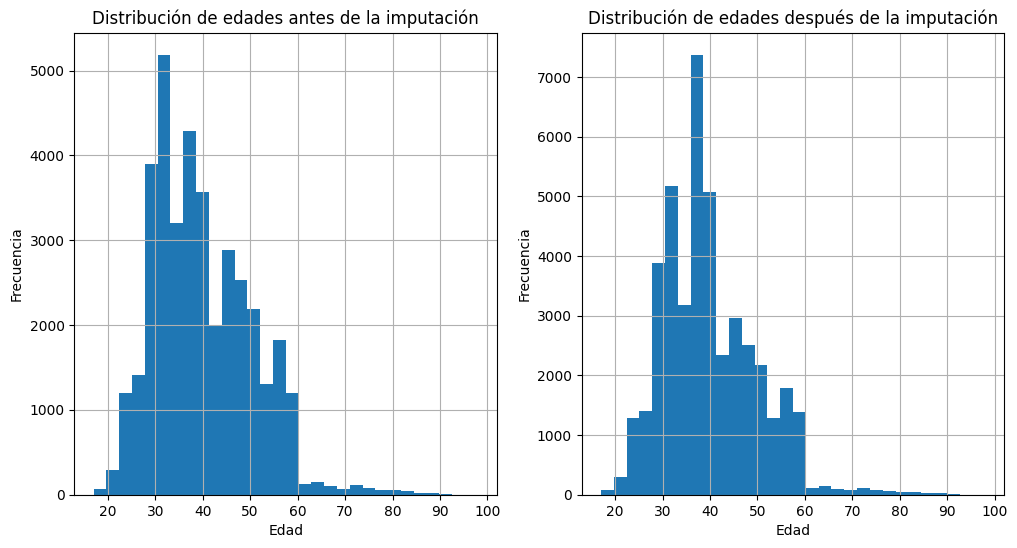

In [71]:
# Comparamos las distribuciones de 'age' antes y después de la imputación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data1['age'].hist(bins=30)
plt.title('Distribución de edades antes de la imputación')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
data_clean['age'].hist(bins=30)
plt.title('Distribución de edades después de la imputación')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [72]:
data_clean.head(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,45,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### Limpieza de la columna 'job'

En esta columna se observan pocos Nan (que sustituiremos por 'unknown') y el valor admin.

In [73]:
data_clean['job'].isnull().sum()

345

In [74]:
data_clean['job'].value_counts()

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64

In [76]:
# Sustituimos los NaN de 'job' por 'unknown'i 'admin.' por 'administrative'
data_clean['job'] = data_clean['job'].fillna('unknown')
data_clean['job'] = data_clean['job'].replace('admin.', 'administrative')

### Limpieza de la columna 'marital'

In [43]:
data2 = pd.read_excel('/Users/claudiarm2002/Documents/DatosProyecto/customer-details.xlsx')  

FileNotFoundError: [Errno 2] No such file or directory: '/Users/claudiarm2002/Documents/DatosProyecto/customer-details.xlsx'